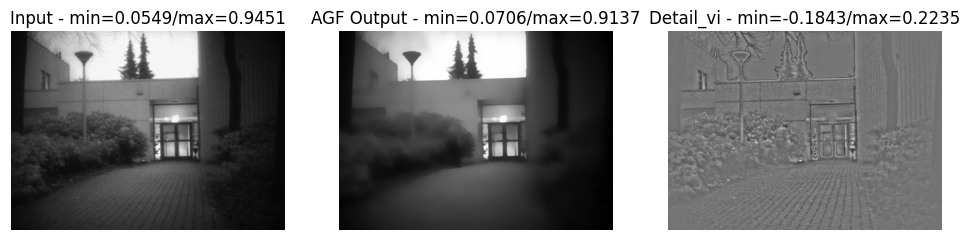

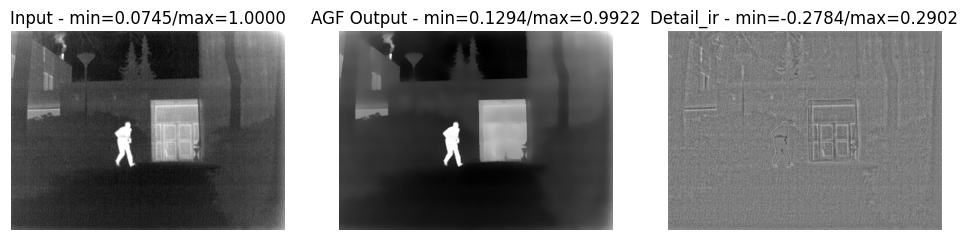

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from decomposition.AGF_decomposition import agf_decomposition

# Decompose the visible image
img_vi = cv2.imread("C:\\LTHH\\data\\TNO\\vi\\17.png", cv2.IMREAD_GRAYSCALE)
img_vi = img_vi.astype(np.float32) / 255.0

base_vi, detail_vi = agf_decomposition(
    img_vi,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title(f"Input - min={img_vi.min():.4f}/max={img_vi.max():.4f}"); plt.imshow(img_vi, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"AGF Output - min={base_vi.min():.4f}/max={base_vi.max():.4f}"); plt.imshow(base_vi, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Detail_vi - min={detail_vi.min():.4f}/max={detail_vi.max():.4f}"); plt.imshow(detail_vi, cmap="gray"); plt.axis("off")
plt.show()

# Decompose the infrared image
img_ir = cv2.imread("C:\\LTHH\\data\\TNO\\ir\\17.png", cv2.IMREAD_GRAYSCALE)
img_ir = img_ir.astype(np.float32) / 255.0  

base_ir, detail_ir = agf_decomposition(
    img_ir,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title(f"Input - min={img_ir.min():.4f}/max={img_ir.max():.4f}"); plt.imshow(img_ir, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"AGF Output - min={base_ir.min():.4f}/max={base_ir.max():.4f}"); plt.imshow(base_ir, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Detail_ir - min={detail_ir.min():.4f}/max={detail_ir.max():.4f}"); plt.imshow(detail_ir, cmap="gray"); plt.axis("off")
plt.show()

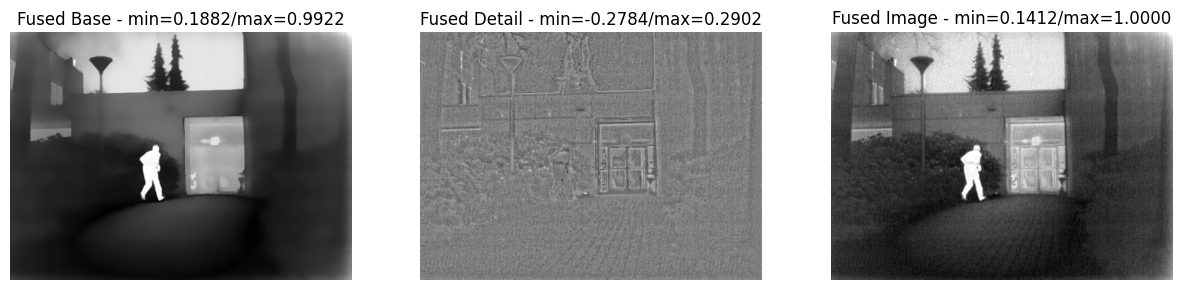

In [11]:
from detail_fusion.MGA_WLE import fuse_detail_dynamic_WLE_im2col
from detail_fusion.MHA_WLE import fuse_detail_dynamic_WLE_hybrid
from detail_fusion.MVA_WLE import fuse_detail_dynamic_WLE_im2col_var_optimizer

base_fused = np.maximum(base_vi, base_ir)
# detail_fulsed = fuse_detail_dynamic_WLE_im2col(detail_ir, detail_vi)
detail_fulsed = fuse_detail_dynamic_WLE_hybrid(detail_ir, detail_vi)
fused = np.clip(base_fused + detail_fulsed, 0, 1)

cv2.imwrite("C:\\LTHH\\data\\output\\AGF_fusion_base.png", (fused * 255).astype(np.uint8))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title(f"Fused Base - min={base_fused.min():.4f}/max={base_fused.max():.4f}"); plt.imshow(base_fused, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"Fused Detail - min={detail_fulsed.min():.4f}/max={detail_fulsed.max():.4f}"); plt.imshow(detail_fulsed, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Fused Image - min={fused.min():.4f}/max={fused.max():.4f}"); plt.imshow(fused, cmap="gray"); plt.axis("off")
plt.show()

In [12]:
from skimage import io
from Indicator.show_indicator import show_indicator_csv_6

img_ir_io = io.imread("C:\\LTHH\\data\\TNO\\ir\\17.png")
img_vi_io = io.imread("C:\\LTHH\\data\\TNO\\vi\\17.png")
img_fused_io = io.imread("C:\\LTHH\\data\\output\\AGF_fusion_base.png")

MI, QG, EN, SD, ALI, VIF = show_indicator_csv_6('test', img_ir_io, img_vi_io, img_fused_io)

print(f"MI: {MI:.4f}, QG: {QG:.4f}, EN: {EN:.4f}, SD: {SD:.4f}, ALI: {ALI:.4f}, VIF: {VIF:.4f}")

MI: 4.8057, QG: 0.5944, EN: 7.2308, SD: 0.2007, ALI: 0.4352, VIF: 0.9172


In [ ]:
'''
gauss: MI: 4.7239, QG: 0.5799, EN: 7.2321, SD: 0.2007, ALI: 0.4353, VIF: 0.9157
var: MI: 4.8081, QG: 0.5953, EN: 7.2307, SD: 0.2007, ALI: 0.4352, VIF: 0.9174
hybrid: MI: 4.8057, QG: 0.5944, EN: 7.2308, SD: 0.2007, ALI: 0.4352, VIF: 0.9172
'''